# 统计学习导论第一次作业
作业任务：使用sklearn库自带房价预测数据，利用多种线性回归模型实现模型训练、预测与选择

姓名：欧阳瑞志、班级：统计22、学号：220403102

## 一、数据导入
波士顿房价数据集在sklearn1.2版本后被删了，官方说涉及道德问题；  
但波士顿房价可以参考这个网站 https://lib.stat.cmu.edu/datasets/boston  
我用的sklearn提供的另一组房价数据:加利福尼亚房价数据集。

In [1]:
import ssl
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet, Lars, LassoLars, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score 
import numpy as np
import matplotlib.pyplot as plt

'''
波士顿房价数据集在sklearn1.2版本后被删了，官方说涉及道德问题；
但波士顿房价可以参考这个网站 https://lib.stat.cmu.edu/datasets/boston
我用的sklearn提供的另一组房价数据:加利福尼亚房价数据集。
'''

# 先关闭下SSL证书验证 再调加州房价数据
ssl._create_default_https_context = ssl._create_unverified_context
housing = fetch_california_housing()

print("输入数据形状：", housing.data.shape)
print("目标值形状：", housing.target.shape)
print("特征名称：", housing.feature_names[0:8])

# 设置输入、输出数据
X = housing.data
y = housing.target

print("输入数据：", X)
print("输出数据：", y)

输入数据形状： (20640, 8)
目标值形状： (20640,)
特征名称： ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
输入数据： [[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
输出数据： [4.526 3.585 3.521 ... 0.923 0.847 0.894]


## 二、数据预处理
但通过对比，这归一化一下还不如不归一化，我也不知道为什么，所以这一步归一化注释掉了，但我知道要做预处理让数据满足基本假定：）

In [2]:
# 数据归一化（但效果不如没归一化的）
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


## 三、训练集、验证集和测试集的划分
60%训练集、20%验证集、20%的测试集  
训练集：训练模型参数  
验证集：判断模型好坏、防止过拟合  
测试集：用来预测  
添加验证集的目的是为了防止模型训练后直接进入预测集，导致模型训练时参数的训练有“作弊”嫌疑，因此分离开来，提高模型的泛化能力，增强鲁棒性  
随机种子默认设置

In [5]:
# 划分训练集 80% 和测试集 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练集划分为训练集 60% 和测试集 20%
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

## 四、模型的训练
### 4.1 LASSO回归模型
超参数设置：对比MAPE选择相对较小时alpha=0.001

LASSO回归下验证集效果：
验证集上的均方误差（MSE）： 0.5290086587604129
验证集上的均方根误差（RMSE）： 0.7273298142936345
验证集上的平均绝对误差（MAE）： 0.5334991523560271
验证集上的平均绝对百分比误差（MAPE）： 0.31678185496475786
验证集上的R²得分： 0.61473859876922


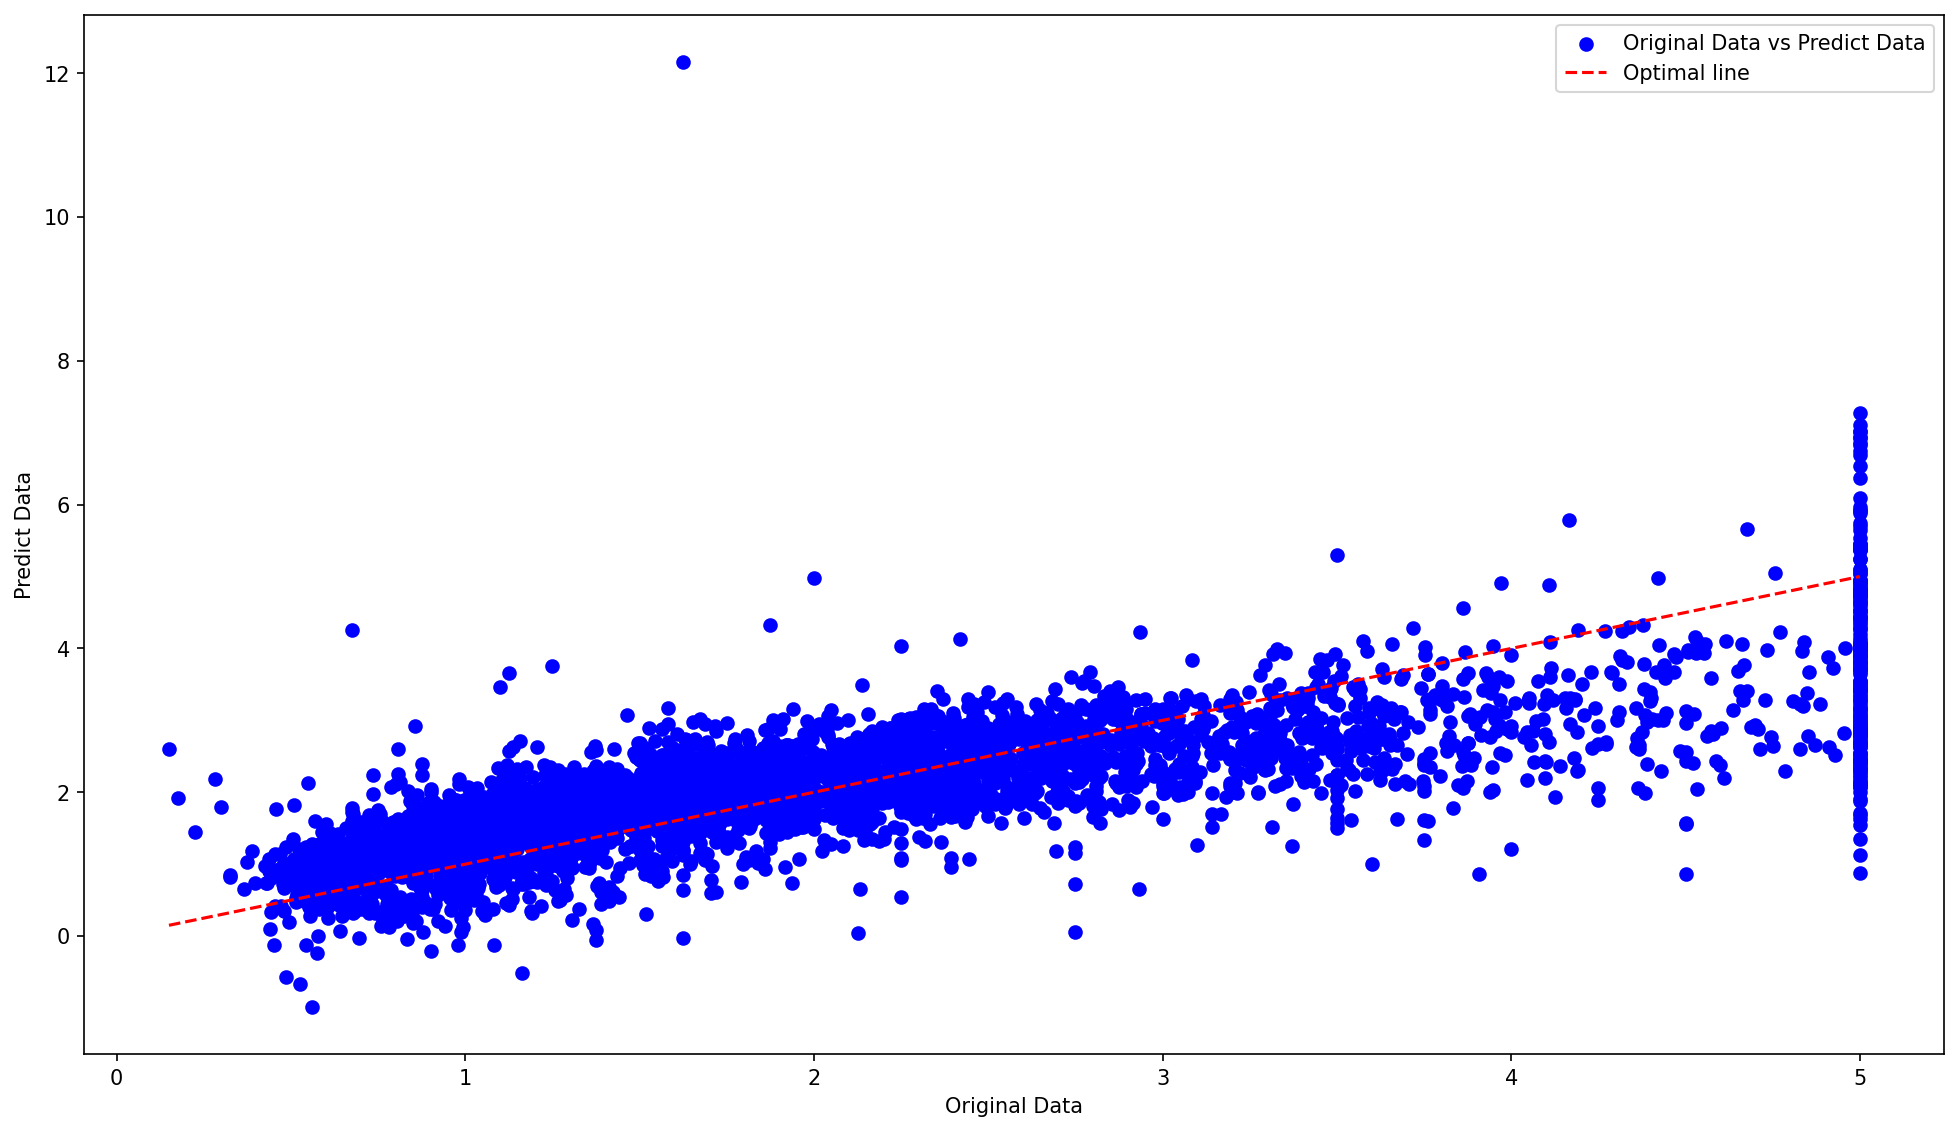

In [6]:
## Lasso回归
# 模型训练
lasso_model = Lasso(alpha=0.001) # 调参发现:设置0.001 MAPE相对小
lasso_model.fit(X_train, y_train)

# 在验证集上评估模型
y_val_pred = lasso_model.predict(X_val)

mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
mae_val = mean_absolute_error(y_val, y_val_pred)
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print("LASSO回归下验证集效果：")
print("验证集上的均方误差（MSE）：", mse_val)
print("验证集上的均方根误差（RMSE）：", rmse_val)
print("验证集上的平均绝对误差（MAE）：", mae_val)
print("验证集上的平均绝对百分比误差（MAPE）：", mape_val)
print("验证集上的R²得分：", r2_val)

# 在测试集上进行预测
y_test_pred = lasso_model.predict(X_test)

plt.figure(figsize=(16, 9), dpi=150)
plt.scatter(y_test, y_test_pred, color='blue', label="Original Data vs Predict Data")
plt.xlabel("Original Data")
plt.ylabel("Predict Data")
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], color='red', linestyle='--', label="Optimal line")
plt.legend()
plt.savefig(fname="Lasso回归预测结果.png")

### 4.2 岭回归模型
超参数设置：对比MAPE选择相对较小时alpha=0.5

Ridge回归下验证集效果：
验证集上的均方误差（MSE）： 0.5297225835679442
验证集上的均方根误差（RMSE）： 0.7278204336015472
验证集上的平均绝对误差（MAE）： 0.5333393507466432
验证集上的平均绝对百分比误差（MAPE）： 0.31676373362909777
验证集上的R²得分： 0.6142186683915823


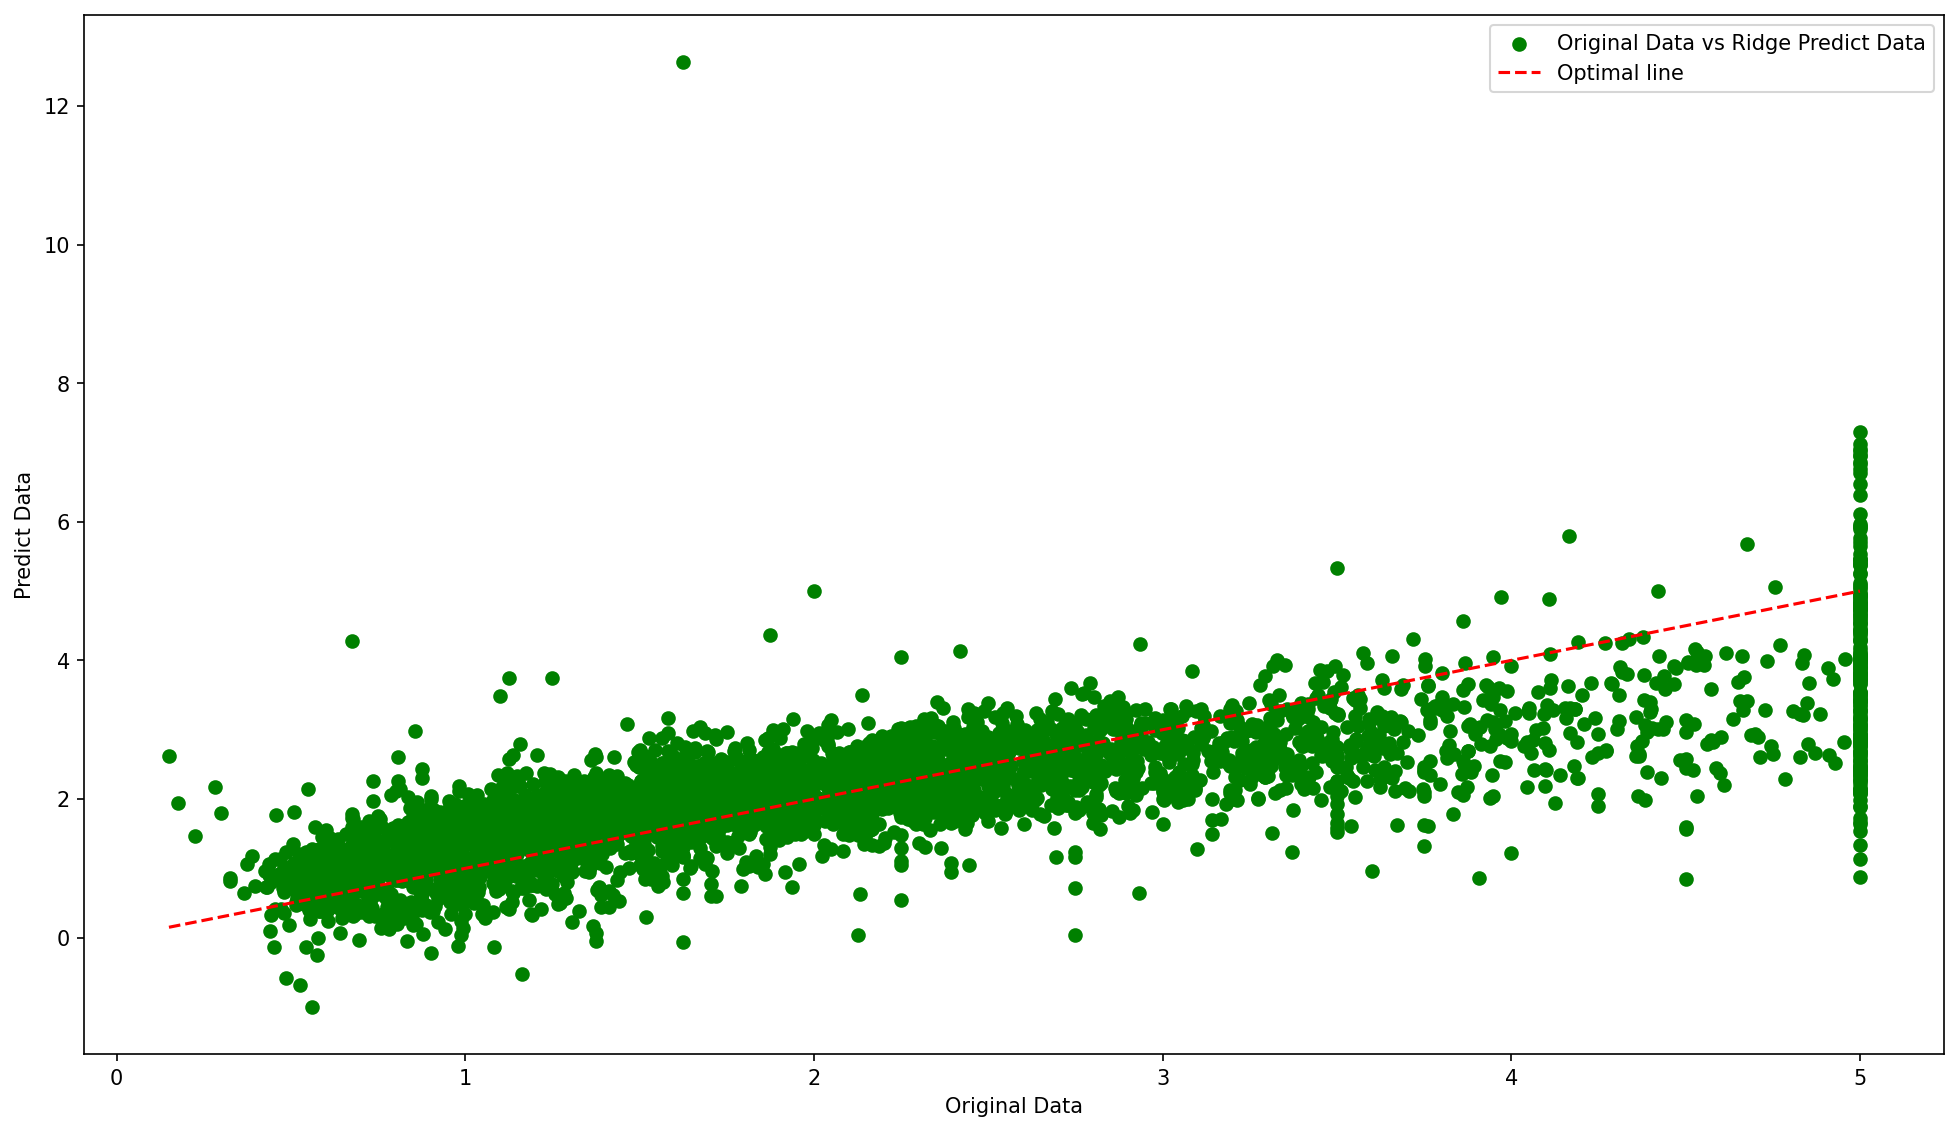

In [7]:
## 岭回归
# 模型训练
ridge_model = Ridge(alpha=0.5)  # 调参发现:设置0.001 MAPE相对小
ridge_model.fit(X_train, y_train)

# 在验证集上评估模型
y_val_pred_ridge = ridge_model.predict(X_val)

mse_val_ridge = mean_squared_error(y_val, y_val_pred_ridge)
rmse_val_ridge = np.sqrt(mse_val_ridge)
mae_val_ridge = mean_absolute_error(y_val, y_val_pred_ridge)
mape_val_ridge = mean_absolute_percentage_error(y_val, y_val_pred_ridge)
r2_val_ridge = r2_score(y_val, y_val_pred_ridge)

print("Ridge回归下验证集效果：")
print("验证集上的均方误差（MSE）：", mse_val_ridge)
print("验证集上的均方根误差（RMSE）：", rmse_val_ridge)
print("验证集上的平均绝对误差（MAE）：", mae_val_ridge)
print("验证集上的平均绝对百分比误差（MAPE）：", mape_val_ridge)
print("验证集上的R²得分：", r2_val_ridge)

# 在测试集上进行预测
y_test_pred_ridge = ridge_model.predict(X_test)

plt.figure(figsize=(16, 9), dpi=150)
plt.scatter(y_test, y_test_pred_ridge, color='green', label="Original Data vs Ridge Predict Data")
plt.xlabel("Original Data")
plt.ylabel("Predict Data")
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], color='red', linestyle='--', label="Optimal line")
plt.legend()
plt.savefig(fname="Ridge回归预测结果.png")

### 4.3 弹性网模型
超参数设置：调参发现alpha=0.01、l1_ratio=0.01 MAPE相对小

ElasticNet回归下验证集效果：
验证集上的均方误差（MSE）： 0.5275653116814869
验证集上的均方根误差（RMSE）： 0.7263369133408317
验证集上的平均绝对误差（MAE）： 0.5349296160362311
验证集上的平均绝对百分比误差（MAPE）： 0.31726351190437657
验证集上的R²得分： 0.6157897458702758


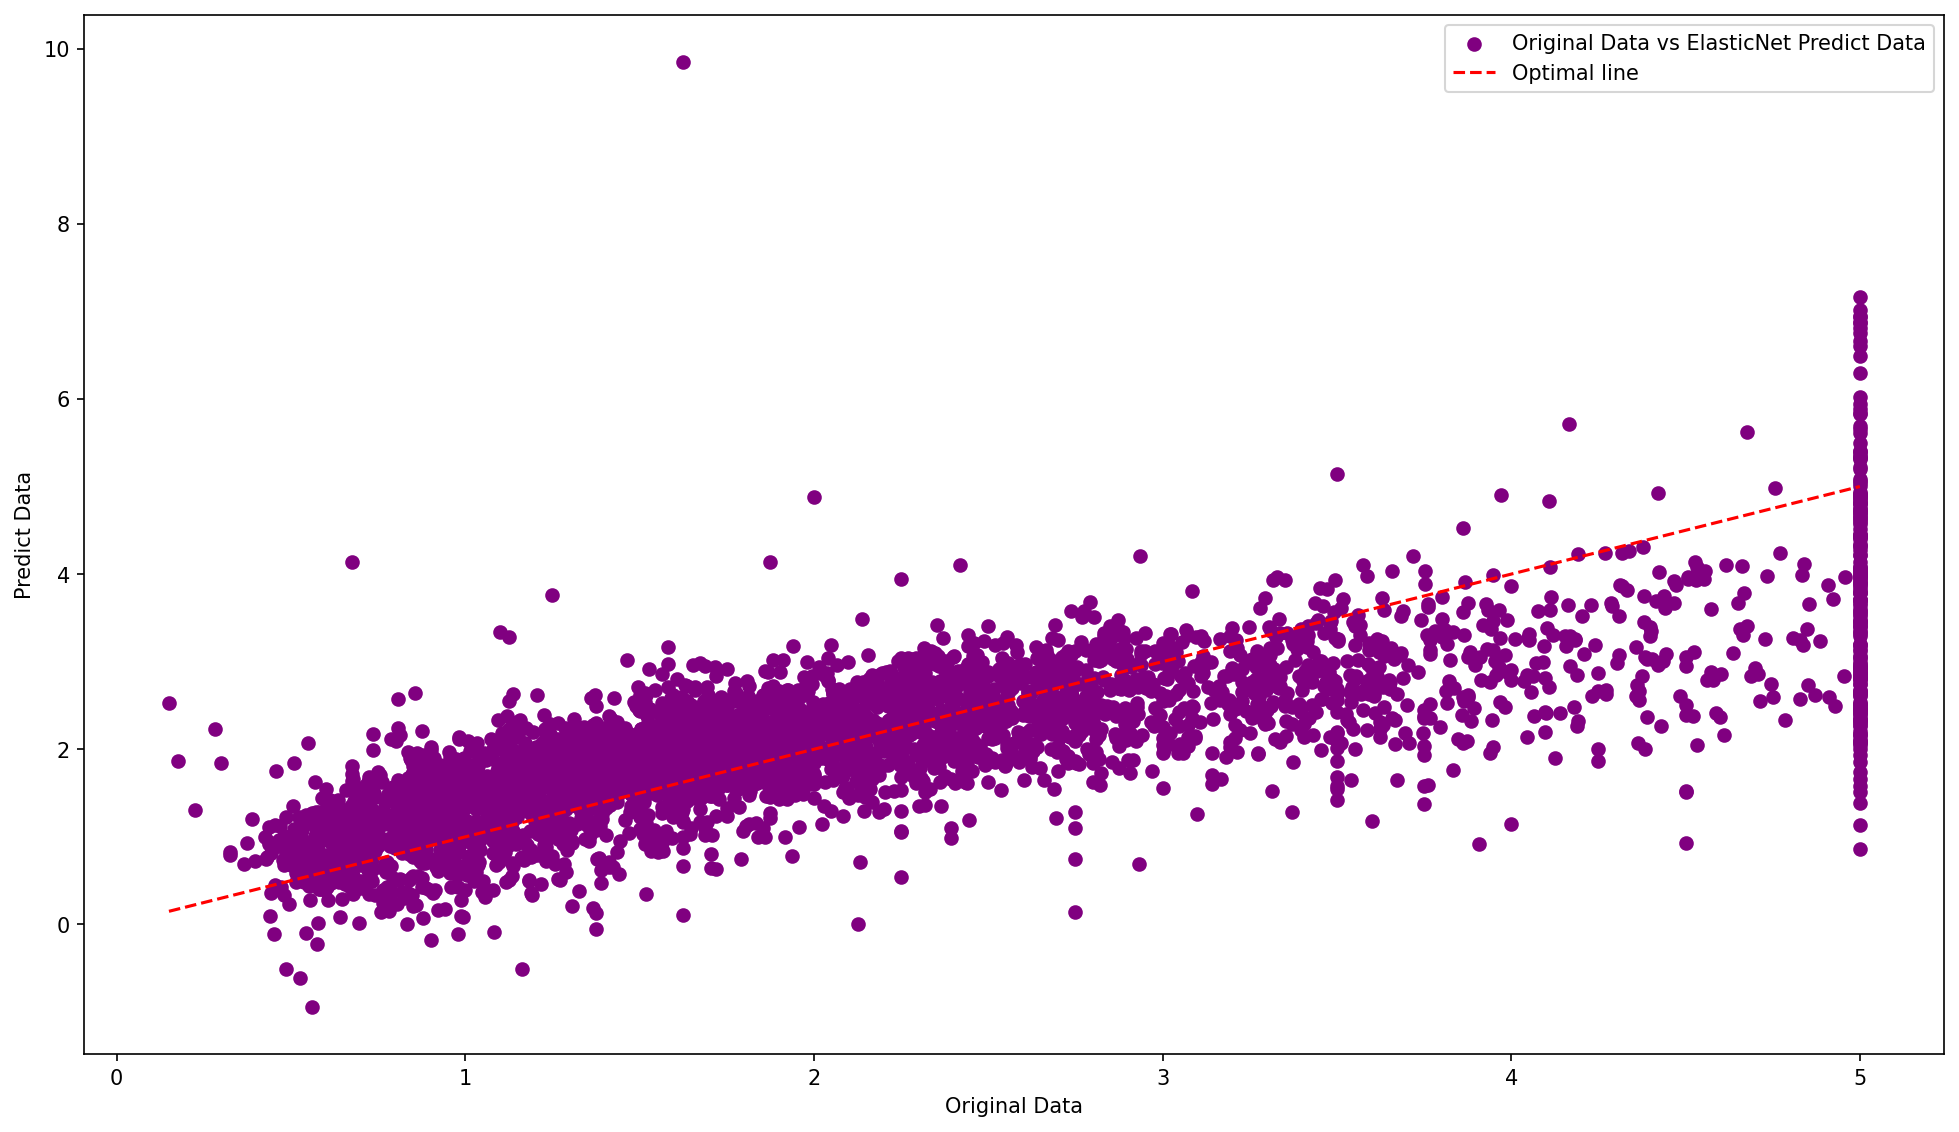

In [8]:
## 弹性网回归
# 模型训练
elastic_net_model = ElasticNet(alpha=0.01, l1_ratio=0.01)  # 调参发现:alpha=0.01、l1_ratio=0.01 MAPE相对小
elastic_net_model.fit(X_train, y_train)

# 在验证集上评估模型
y_val_pred_elastic = elastic_net_model.predict(X_val)

mse_val_elastic = mean_squared_error(y_val, y_val_pred_elastic)
rmse_val_elastic = np.sqrt(mse_val_elastic)
mae_val_elastic = mean_absolute_error(y_val, y_val_pred_elastic)
mape_val_elastic = mean_absolute_percentage_error(y_val, y_val_pred_elastic)
r2_val_elastic = r2_score(y_val, y_val_pred_elastic)

print("ElasticNet回归下验证集效果：")
print("验证集上的均方误差（MSE）：", mse_val_elastic)
print("验证集上的均方根误差（RMSE）：", rmse_val_elastic)
print("验证集上的平均绝对误差（MAE）：", mae_val_elastic)
print("验证集上的平均绝对百分比误差（MAPE）：", mape_val_elastic)
print("验证集上的R²得分：", r2_val_elastic)

# 在测试集上进行预测
y_test_pred_elastic = elastic_net_model.predict(X_test)

plt.figure(figsize=(16, 9), dpi=150)
plt.scatter(y_test, y_test_pred_elastic, color='purple', label="Original Data vs ElasticNet Predict Data")
plt.xlabel("Original Data")
plt.ylabel("Predict Data")
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], color='red', linestyle='--', label="Optimal line")
plt.legend()
plt.savefig(fname="ElasticNeti回归预测结果.png")

### 4.4 最小角度模型

Least Angle 回归下验证集效果：
验证集上的均方误差（MSE）： 0.5334653283299355
验证集上的均方根误差（RMSE）： 0.7303871085458282
验证集上的平均绝对误差（MAE）： 0.5332120531591694
验证集上的平均绝对百分比误差（MAPE）： 0.3162973434344181
验证集上的R²得分： 0.6114929377866567


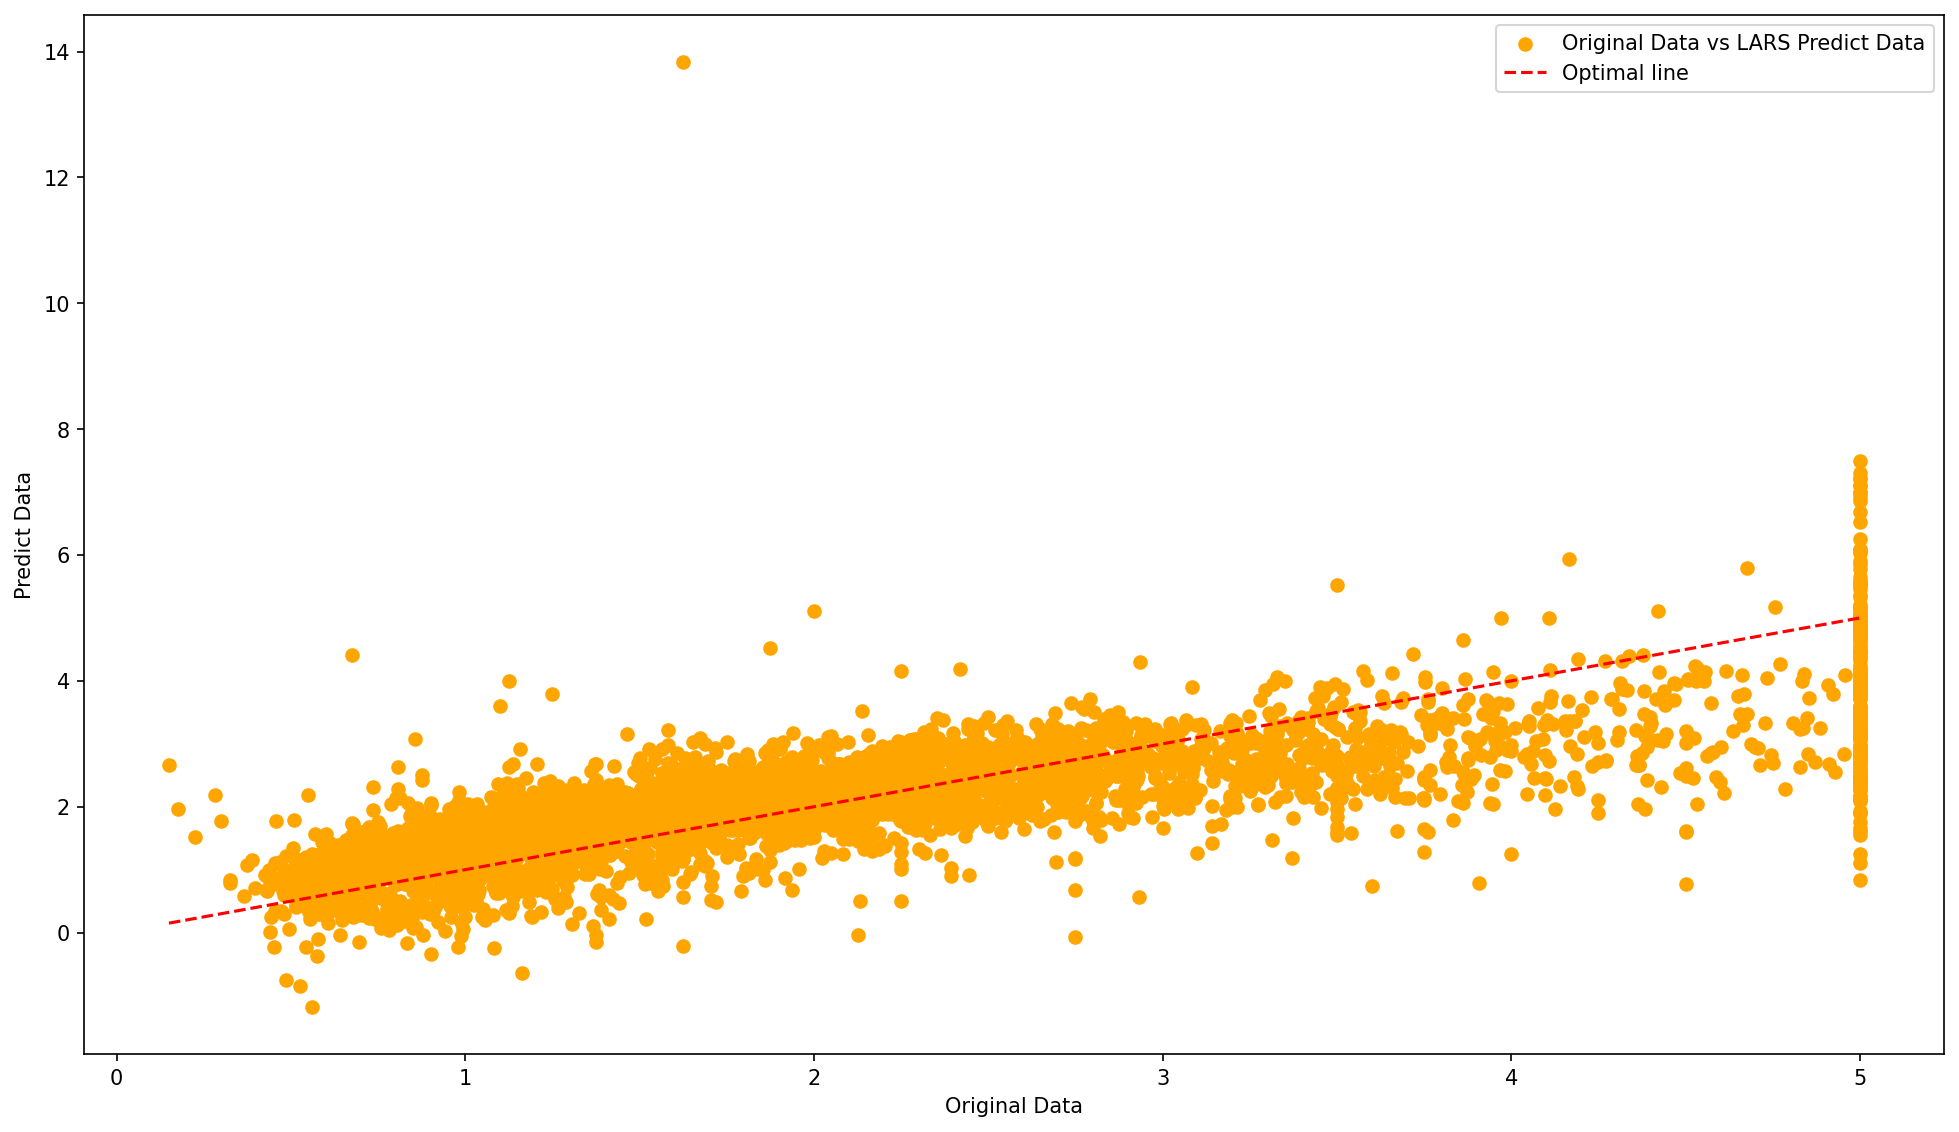

In [9]:
## 最小角度回归
# 模型训练
lars_model = Lars()
lars_model.fit(X_train, y_train)

# 在验证集上评估模型
y_val_pred_lars = lars_model.predict(X_val)

mse_val_lars = mean_squared_error(y_val, y_val_pred_lars)
rmse_val_lars = np.sqrt(mse_val_lars)
mae_val_lars = mean_absolute_error(y_val, y_val_pred_lars)
mape_val_lars = mean_absolute_percentage_error(y_val, y_val_pred_lars)
r2_val_lars = r2_score(y_val, y_val_pred_lars)

print("Least Angle 回归下验证集效果：")
print("验证集上的均方误差（MSE）：", mse_val_lars)
print("验证集上的均方根误差（RMSE）：", rmse_val_lars)
print("验证集上的平均绝对误差（MAE）：", mae_val_lars)
print("验证集上的平均绝对百分比误差（MAPE）：", mape_val_lars)
print("验证集上的R²得分：", r2_val_lars)

# 在测试集上进行预测
y_test_pred_lars = lars_model.predict(X_test)

plt.figure(figsize=(16, 9), dpi=150)
plt.scatter(y_test, y_test_pred_lars, color='orange', label="Original Data vs LARS Predict Data")
plt.xlabel("Original Data")
plt.ylabel("Predict Data")
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], color='red', linestyle='--', label="Optimal line")
plt.legend()
plt.savefig(fname="LARS回归预测结果.png")

### 4.5 LARS-Lasso回归模型
超参数设置：调参发现设置0.001 MAPE相对小

LARS Lasso回归下验证集效果：
验证集上的均方误差（MSE）： 0.5290085642927687
验证集上的均方根误差（RMSE）： 0.7273297493522237
验证集上的平均绝对误差（MAE）： 0.53349930653237
验证集上的平均绝对百分比误差（MAPE）： 0.31678206909232176
验证集上的R²得分： 0.6147386675672187


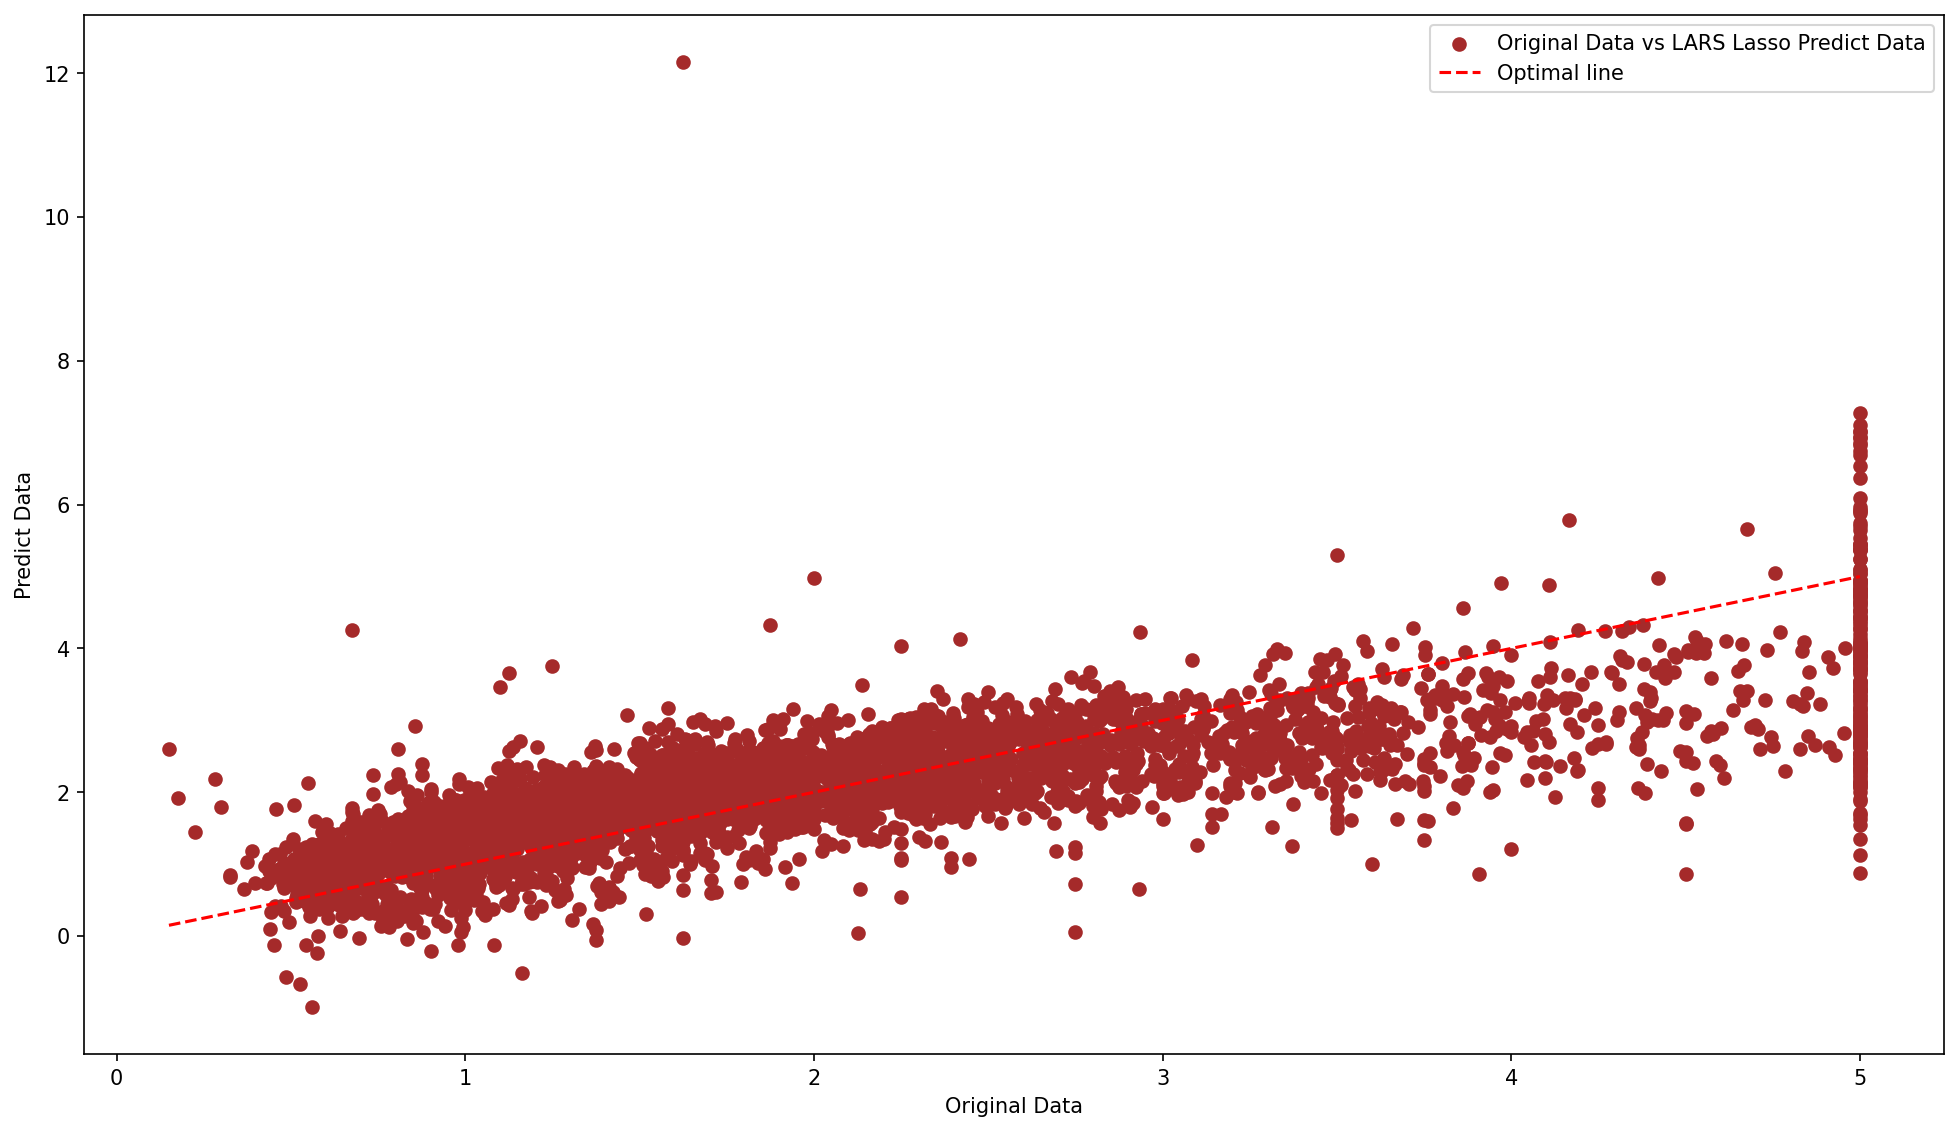

In [11]:
## LARS-Lasso回归
# 模型训练
lars_lasso_model = LassoLars(alpha=0.001)   # 调参发现:设置0.001 MAPE相对小
lars_lasso_model.fit(X_train, y_train)

# 在验证集上评估模型
y_val_pred_lars_lasso = lars_lasso_model.predict(X_val)

mse_val_lars_lasso = mean_squared_error(y_val, y_val_pred_lars_lasso)
rmse_val_lars_lasso = np.sqrt(mse_val_lars_lasso)
mae_val_lars_lasso = mean_absolute_error(y_val, y_val_pred_lars_lasso)
mape_val_lars_lasso = mean_absolute_percentage_error(y_val, y_val_pred_lars_lasso)
r2_val_lars_lasso = r2_score(y_val, y_val_pred_lars_lasso)

print("LARS Lasso回归下验证集效果：")
print("验证集上的均方误差（MSE）：", mse_val_lars_lasso)
print("验证集上的均方根误差（RMSE）：", rmse_val_lars_lasso)
print("验证集上的平均绝对误差（MAE）：", mae_val_lars_lasso)
print("验证集上的平均绝对百分比误差（MAPE）：", mape_val_lars_lasso)
print("验证集上的R²得分：", r2_val_lars_lasso)

# 在测试集上进行预测
y_test_pred_lars_lasso = lars_lasso_model.predict(X_test)

plt.figure(figsize=(16, 9), dpi=150)
plt.scatter(y_test, y_test_pred_lars_lasso, color='brown', label="Original Data vs LARS Lasso Predict Data")
plt.xlabel("Original Data")
plt.ylabel("Predict Data")
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], color='red', linestyle='--', label="Optimal line")
plt.legend()
plt.savefig(fname="LARS Lasso回归预测结果.png")

### 4.6 随机梯度下降回归模型
使用前先对数据做一个标准化处理
#### loss 指损失函数,可选择的有:   
    'squared_error'-- 平方损失函数,  
    'huber'-- Huber损失函数,  
    'epsilon_insensitive'-- epsilon-不敏感损失,  
    'squared_epsilon_insensitive'-- 平方epsilon-不敏感损失  
#### learning_rate 指学习率策略,可选择的有:  
    'constant'-- 常数学习率  
    'optimal'-- 最优学习率  
    'invscaling'-- 逆缩放学习率  
    'adaptive'-- 自适应学习率  
#### eta0 指初始学习率: 调参选择  
#### penalty 指惩罚函数  
    'l1'-- L1范数惩罚/Lasso惩罚  
    'l2'-- L2范数惩罚/岭惩罚  
    'elasticnet'-- 弹性网络惩罚  
#### alpha 指惩罚项系数: 调参选择  
#### max_iter 指最大迭代次数: 调参选择   

随机梯度下降回归下验证集效果：
验证集上的均方误差（MSE）： 0.7406869516720749
验证集上的均方根误差（RMSE）： 0.8606317166314955
验证集上的平均绝对误差（MAE）： 0.6845889698558326
验证集上的平均绝对百分比误差（MAPE）： 0.4757376196517435
验证集上的R²得分： 0.460579542226781


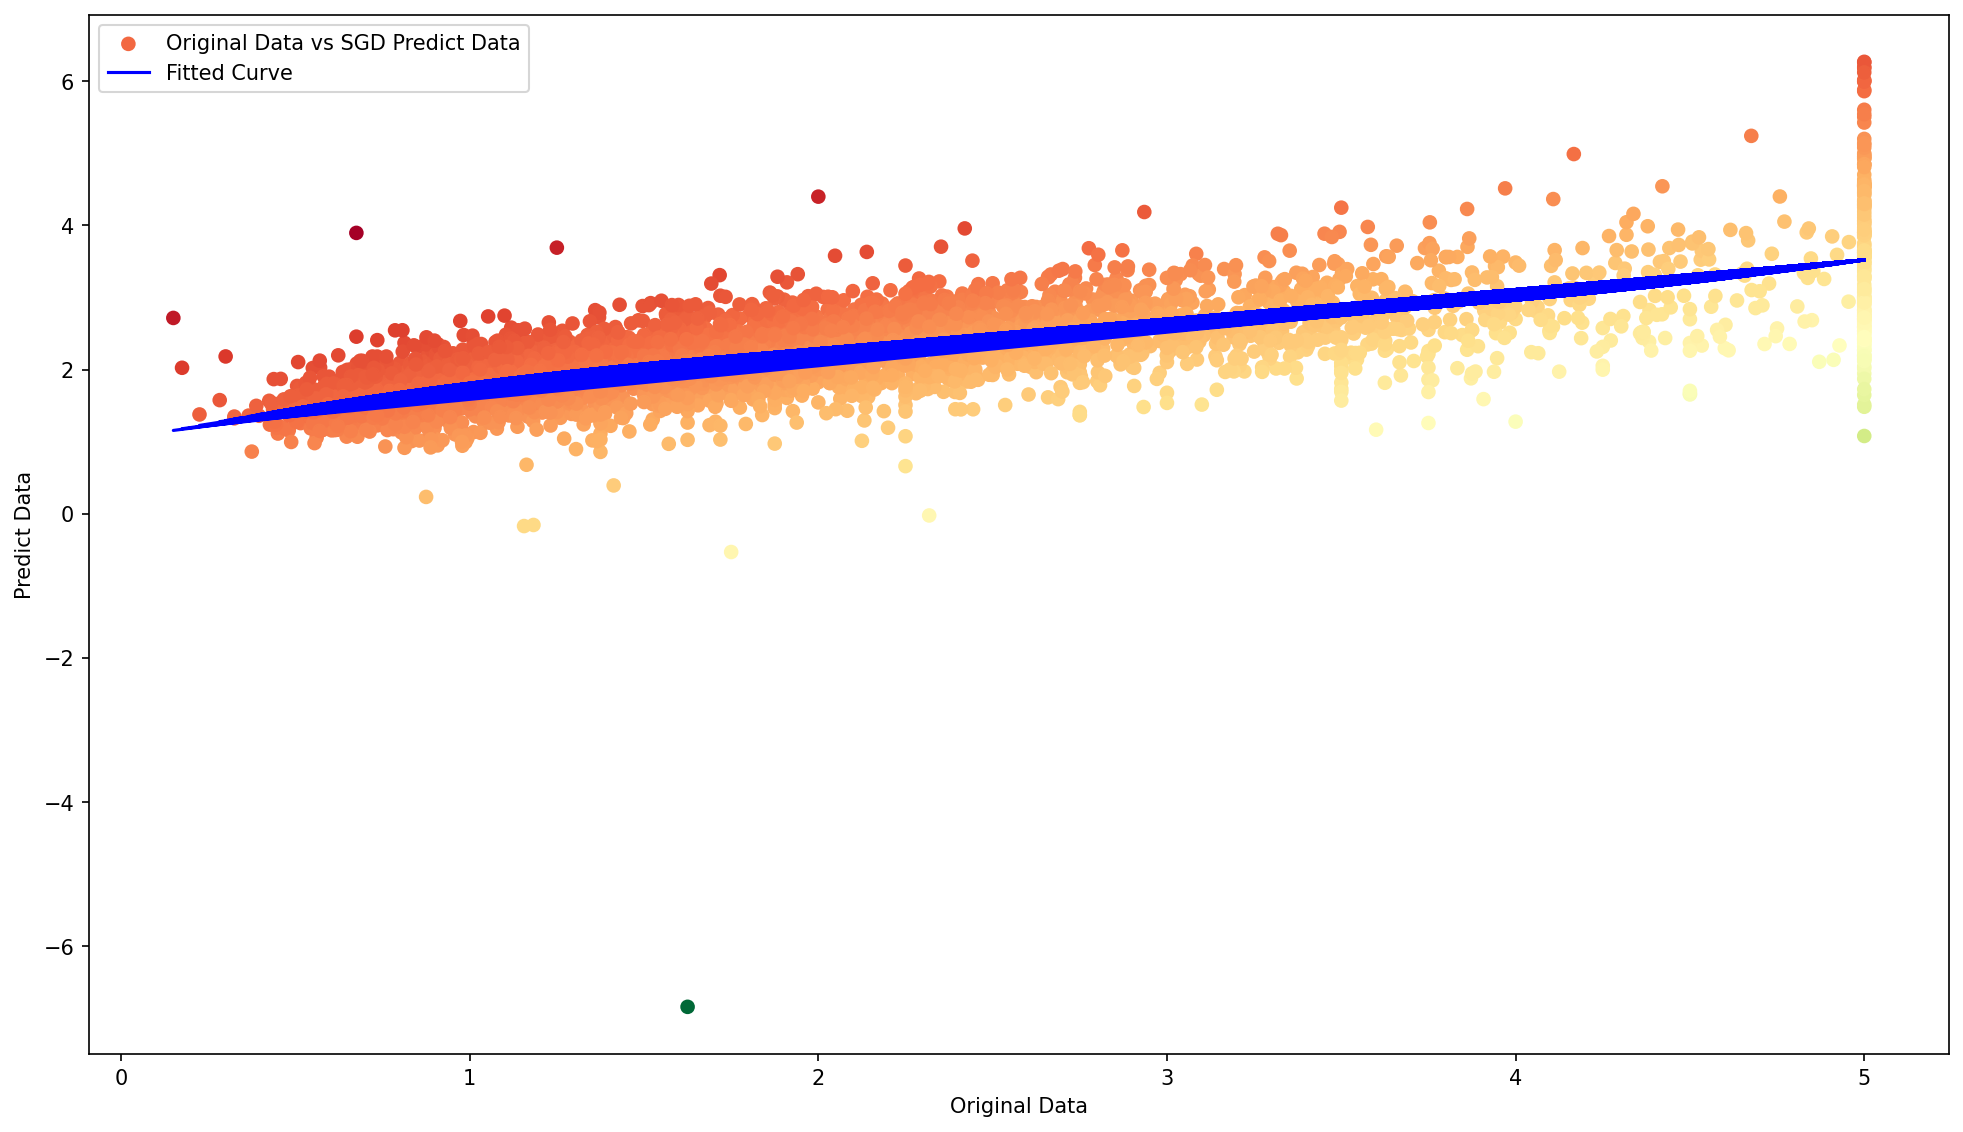

In [12]:
## 随机梯度下降回归
# 设置输入、输出数据
housing = fetch_california_housing()
X = housing.data
y = housing.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# 模型参数设置
'''
loss 指损失函数,可选择的有: 
    'squared_error'-- 平方损失函数,
    'huber'-- Huber损失函数,
    'epsilon_insensitive'-- epsilon-不敏感损失,
    'squared_epsilon_insensitive'-- 平方epsilon-不敏感损失
learning_rate 指学习率策略,可选择的有:
    'constant'-- 常数学习率
    'optimal'-- 最优学习率
    'invscaling'-- 逆缩放学习率
    'adaptive'-- 自适应学习率
eta0 指初始学习率: 调参选择
penalty 指惩罚函数
    'l1'-- L1范数惩罚/Lasso惩罚
    'l2'-- L2范数惩罚/岭惩罚
    'elasticnet'-- 弹性网络惩罚
alpha 指惩罚项系数: 调参选择
max_iter 指最大迭代次数: 调参选择
batch_size 设置了就是小批量随机梯度下降
'''
param_grid = {
    'loss': ['squared_error'],
    'learning_rate': ['constant'],
    'eta0': [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5],
    'penalty': ['l2'],
    'alpha': [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5],
    'max_iter': [8000]
}

# 模型训练及参数调优
sgd_model = SGDRegressor(random_state=42)
grid_search = GridSearchCV(sgd_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_sgd_model = grid_search.best_estimator_

# 在验证集上评估模型
y_val_pred_sgd = best_sgd_model.predict(X_val)

mse_val_sgd = mean_squared_error(y_val, y_val_pred_sgd)
rmse_val_sgd = np.sqrt(mse_val_sgd)
mae_val_sgd = mean_absolute_error(y_val, y_val_pred_sgd)
mape_val_sgd = mean_absolute_percentage_error(y_val, y_val_pred_sgd)
r2_val_sgd = r2_score(y_val, y_val_pred_sgd)

print("随机梯度下降回归下验证集效果：")
print("验证集上的均方误差（MSE）：", mse_val_sgd)
print("验证集上的均方根误差（RMSE）：", rmse_val_sgd)
print("验证集上的平均绝对误差（MAE）：", mae_val_sgd)
print("验证集上的平均绝对百分比误差（MAPE）：", mape_val_sgd)
print("验证集上的R²得分：", r2_val_sgd)

# 在测试集上进行预测
y_test_pred_sgd = best_sgd_model.predict(X_test)

# 可视化预测结果
plt.figure(figsize=(16, 9), dpi=150)
# 计算预测偏差
deviation = y_test - y_test_pred_sgd
plt.scatter(y_test, y_test_pred_sgd, c=deviation, cmap='RdYlGn', label="Original Data vs SGD Predict Data")
plt.xlabel("Original Data")
plt.ylabel("Predict Data")

# 绘制拟合曲线（多项式拟合）
z = np.polyfit(y_test, y_test_pred_sgd, 3)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), 'b-', label="Fitted Curve")
plt.legend()
plt.savefig(fname="SGD回归预测结果.png")

## 六、模型的选择
对比MAPE选择最优模型  
不选择AIC、BIC是因为不想再用statsmodels库了

在验证集上具有最小MAPE的最优模型是：Least Angle回归，其最小MAPE值为：0.3162973434344181


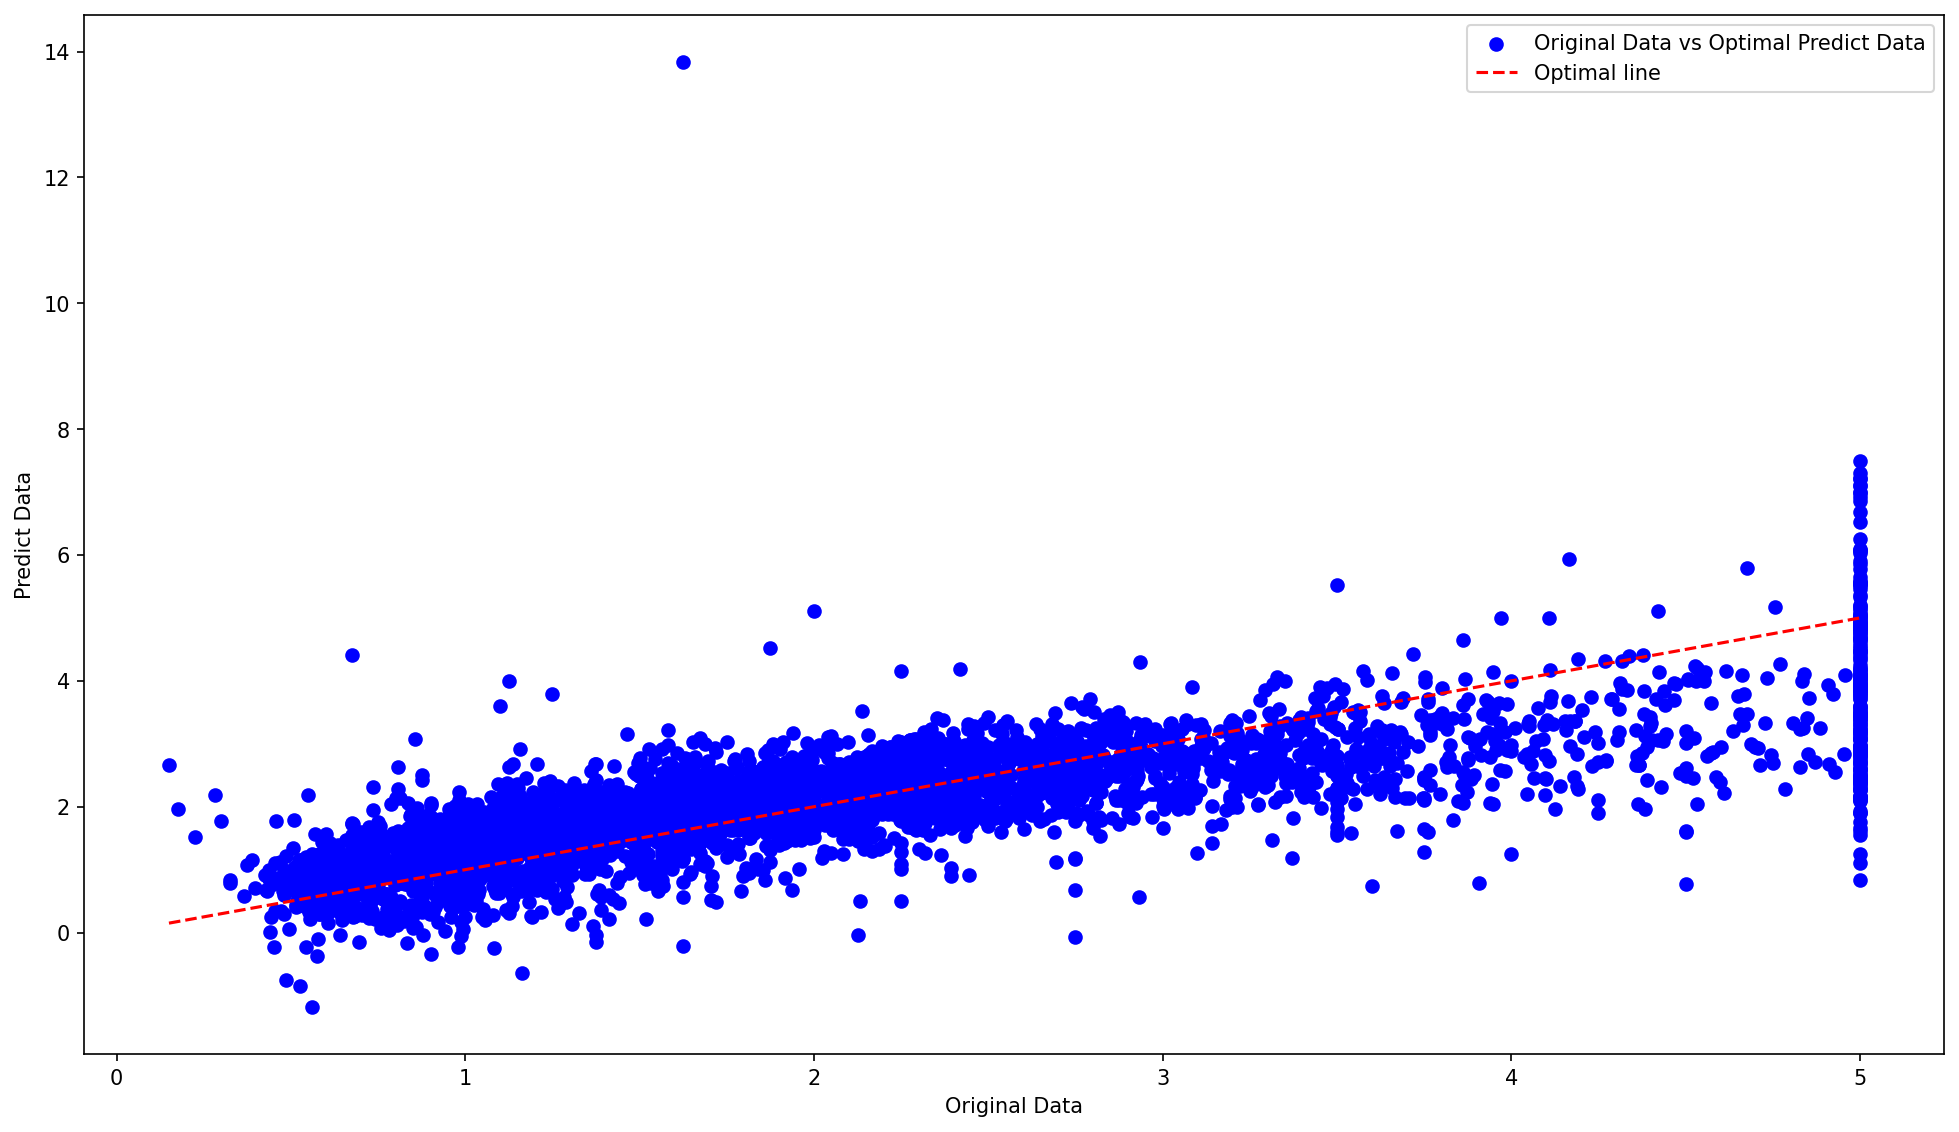

In [13]:
## 模型的选择
model_mapes = {
    "LASSO回归": mape_val,
    "Ridge回归": mape_val_ridge,
    "ElasticNet回归": mape_val_elastic,
    "Least Angle回归": mape_val_lars,
    "LARS Lasso回归": mape_val_lars_lasso,
    "随机梯度下降回归": mape_val_sgd
}

# 找出最小MAPE对应的模型名称和对应的MAPE
min_mape_model_name = min(model_mapes, key=model_mapes.get)
min_mape_value = model_mapes[min_mape_model_name]
print(f"在验证集上具有最小MAPE的最优模型是：{min_mape_model_name}，其最小MAPE值为：{min_mape_value}")

if min_mape_model_name == "LASSO回归":
    optimal_model = lasso_model
    optimal_y_test_pred = y_test_pred
elif min_mape_model_name == "Ridge回归":
    optimal_model = ridge_model
    optimal_y_test_pred = y_test_pred_ridge
elif min_mape_model_name == "ElasticNet回归":
    optimal_model = elastic_net_model
    optimal_y_test_pred = y_test_pred_elastic
elif min_mape_model_name == "Least Angle回归":
    optimal_model = lars_model
    optimal_y_test_pred = y_test_pred_lars
elif min_mape_model_name == "LARS Lasso回归":
    optimal_model = lars_lasso_model
    optimal_y_test_pred = y_test_pred_lars_lasso
elif min_mape_model_name == "随机梯度下降回归":
    optimal_model = best_sgd_model
    optimal_y_test_pred = y_test_pred_sgd

# 绘图
plt.figure(figsize=(16, 9), dpi=150)
plt.scatter(y_test, optimal_y_test_pred, color='blue', label="Original Data vs Optimal Predict Data")
plt.xlabel("Original Data")
plt.ylabel("Predict Data")
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], color='red', linestyle='--', label="Optimal line")
plt.legend()
plt.savefig(fname=f"{min_mape_model_name}最优模型预测结果.png")